### Desafío - Naive Bayes
#### CAMILA VERA VILLA
#### AGOSTO  26

#### Descripción
* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los csv se encuentra en la carpeta dump dentro del proyecto.
* Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a patir de la letra de una canción.
* Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes.

#### Ejercicio 1: Preparar el ambiente de trabajo
* Importe los módulos numpy , pandas , matplotlib , seaborn , glob y os siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta dump .
* Para ello genere un objeto que guarde en una lista todos los archivos alojados en dump utilizando glob.glob y os.getcwd() para extraer las rutas absolutas. Posteriormente genere un objeto pd.DataFrame que contenga todos los csv.
* Asegúrese de eliminar la columna Unnamed: 0 que se genera por defecto.

In [2]:
# librerias clasicas
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#libreria sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

#importe de archivos y ejecucion de comandos de consola
import glob,os

# librerias para graficar
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns


In [3]:
file_list = glob.glob(os.getcwd() + '/dump/*.csv') # Recuperar la lista con todos los .csv en la carpeta dump
append_csv = [] # Arreglo de pd.Dataframes

for f in file_list:
    append_csv.append(pd.read_csv(f, index_col = None,
                    header = 0).drop(columns = 'Unnamed: 0'))
df_lyrics = pd.concat(append_csv) # Concatenamos todos los datafrrames en uno solo
df_lyrics.columns = ['Artist', 'Genre', 'Song', 'Lyrics'] # Renombramos las columnas del nuevo dataframe

In [4]:
df_lyrics.head()

,Artist,Genre,Song,Lyrics
0,Anthrax,metal,Deathrider,"Riding hard, high in the saddle \n Winged stee..."
1,Anthrax,metal,Metal Thrashing Mad,Racing down the road \n In a street machine of...
2,Anthrax,metal,I'm Eighteen,Lines form on my face and hands \n Lines form ...
3,Anthrax,metal,Panic,Move it to the front \n Reaching for the light...
4,Anthrax,metal,Subjugator,Out in the streets \n We're fighting tonight \...


In [5]:
df_lyrics.tail()

,Artist,Genre,Song,Lyrics
246,Weezer,rock,"Thief, You've Taken All That Was Me","Thief, of silent dreams \n Of golden scenes \n..."
247,Weezer,rock,We Are All In Love,When your out with your friends \n In your new...
248,Weezer,rock,We Go Together,We go together \n And that's to stay \n And in...
249,Weezer,rock,What Is This I Find?,[Jonas]: \n What is this I find? \n [Wuan]: \n...
250,Weezer,rock,Zep Jamb,Alright \n Say baby \n Love me \n Lay your mon...


#### Ejercicio 2: Descripción de los datos
* Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    * La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
    * La cantidad de canciones registradas en cada género, ordenados de mayor a menor.
* Comente sobre las principales tendencias.

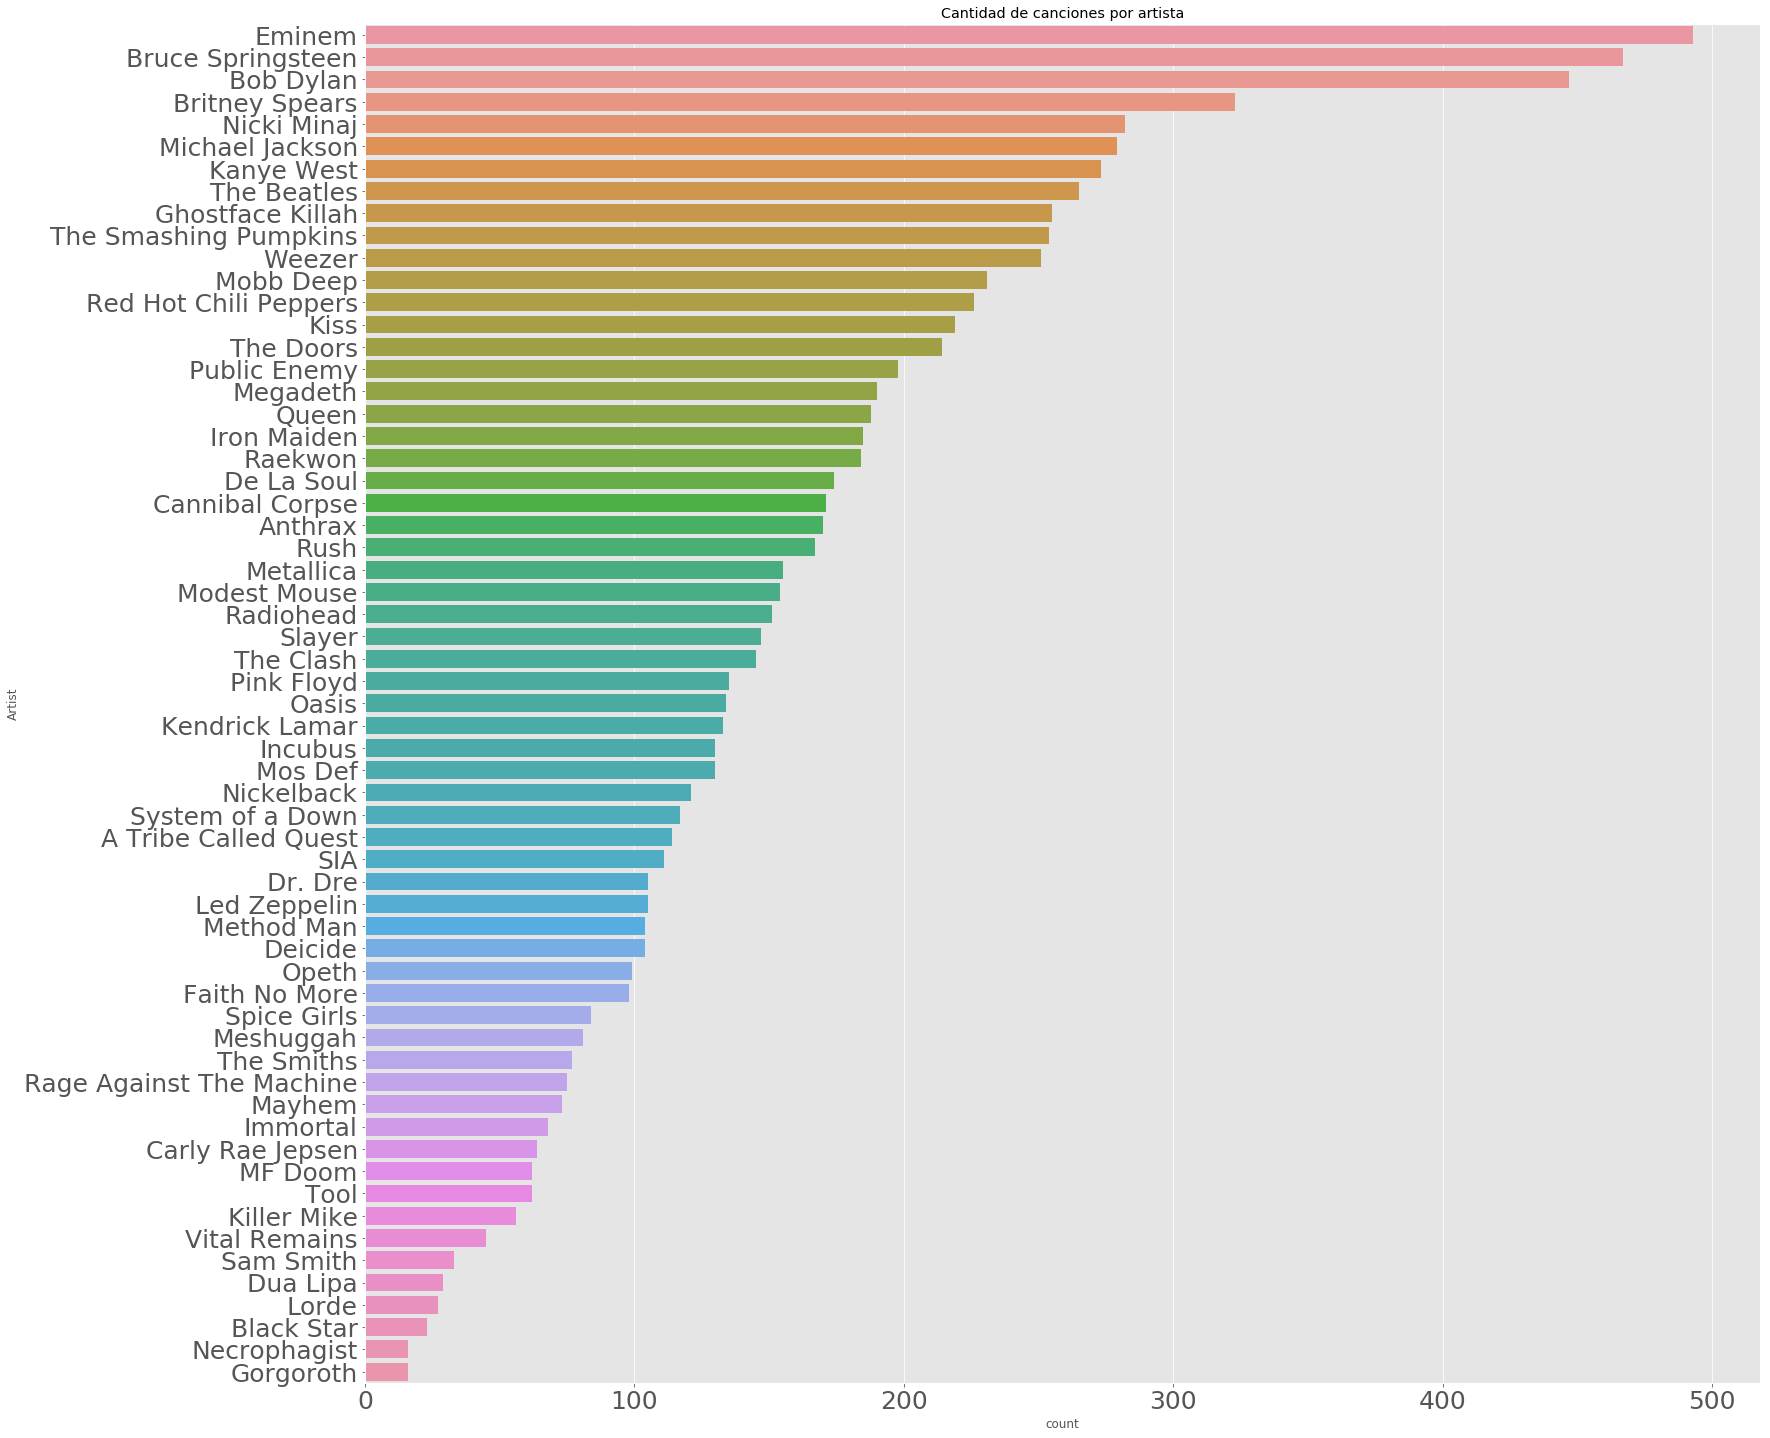

In [6]:
plt.rcParams["figure.figsize"] = (25, 25)
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["xtick.labelsize"] = 25
plt.title('Cantidad de canciones por artista')

sns.countplot(y = 'Artist', order = df_lyrics['Artist'].value_counts().index, data = df_lyrics )


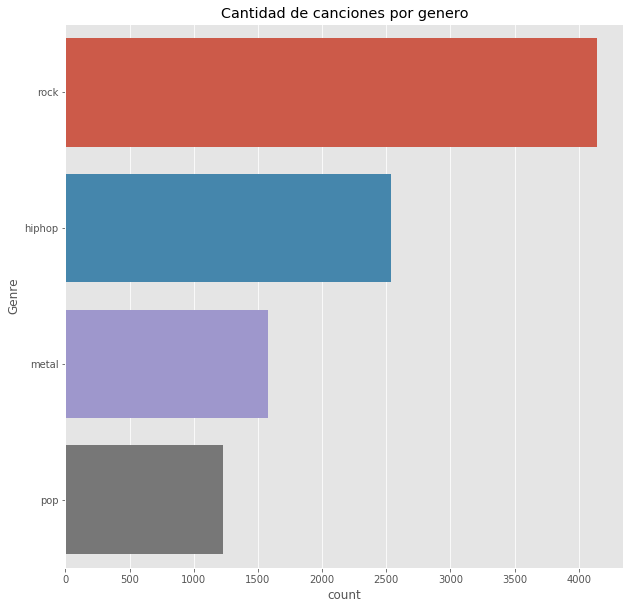

In [7]:

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["xtick.labelsize"] = 10
plt.title('Cantidad de canciones por genero')
sns.countplot(y= 'Genre', order = df_lyrics['Genre'].value_counts().index, data = df_lyrics)

- Eminem (Hip-Hop), Bruce Springsteen (Rock) y Bob Dylan (Rock) son los artistas que poseen la mayor cantidad de canciones.
- El género rock tiene más de 4000 canciones, hip-hop tiene aproximadamente 2500 canciones y en el último lugar se enguentra el género Pop con poco mas de 1000.

#### Ejercicio 3: Matriz de ocurrencias
* Importe la clase CountVectorizer dentro de los módulos feature_extraction.text de la librería sklearn . Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?
    * **R: Generar una matriz de tokens a partir de una coleccion de documentos de texto.**

* Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.
* Genere una función que replique el procedimiento para cada uno de los géneros.
* Comente sobre las principales características de cada género en cuanto a sus palabras.

In [8]:
#funcion para extraer palabras segun frecuencia

def get_words(df, col = 'Lyrics'):

    from sklearn.feature_extraction.text import CountVectorizer
    #Convert a collection of text documents to a matrix of token counts

    # instanciamos un objeto
    count_vectorizer=CountVectorizer(stop_words='english')

    # Implementamos los pasos fit y transform
    count_vectorizer_fit = count_vectorizer.fit_transform(df[col])

    # Extraemos tokens (palabras)
    words = count_vectorizer.get_feature_names()
   
    # extraemos frecuencia
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    
    df2 = pd.DataFrame([list(words),list(words_freq)]).T
    
    df2.columns = ['words','frecuencia']
    
    df2 = df2.sort_values(by='frecuencia', ascending=False)[:100]
    
    return df2
      

In [9]:
get_words(df_lyrics)

,words,frecuencia
24950,like,19629
12859,don,17398
23856,know,14962
18439,got,14171
23287,just,13978
25479,love,11268
48591,yeah,11071
25165,ll,10028
29851,oh,9879
7009,cause,8356


In [10]:
df2 = get_words(df_lyrics)

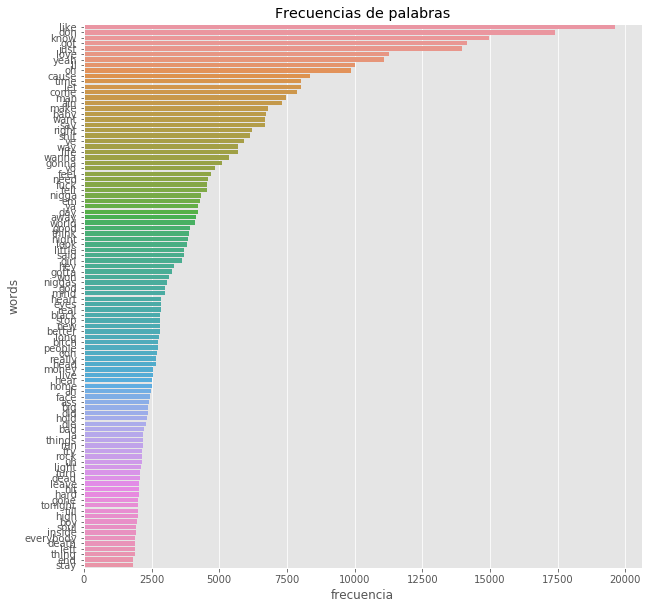

In [11]:
plt.title('Frecuencias de palabras')
plt.rcParams["figure.figsize"] = (25, 25)
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 17
g = sns.barplot(y =df2['words'], x = df2['frecuencia'])
#g.set_yticklabels(g.get_yticklabels(), rotation=15);


Las palabras con mayor frecuencia corresponden a 'like','don' y 'know' y con menor frecuencia estan 'thing','end' y 'stay.

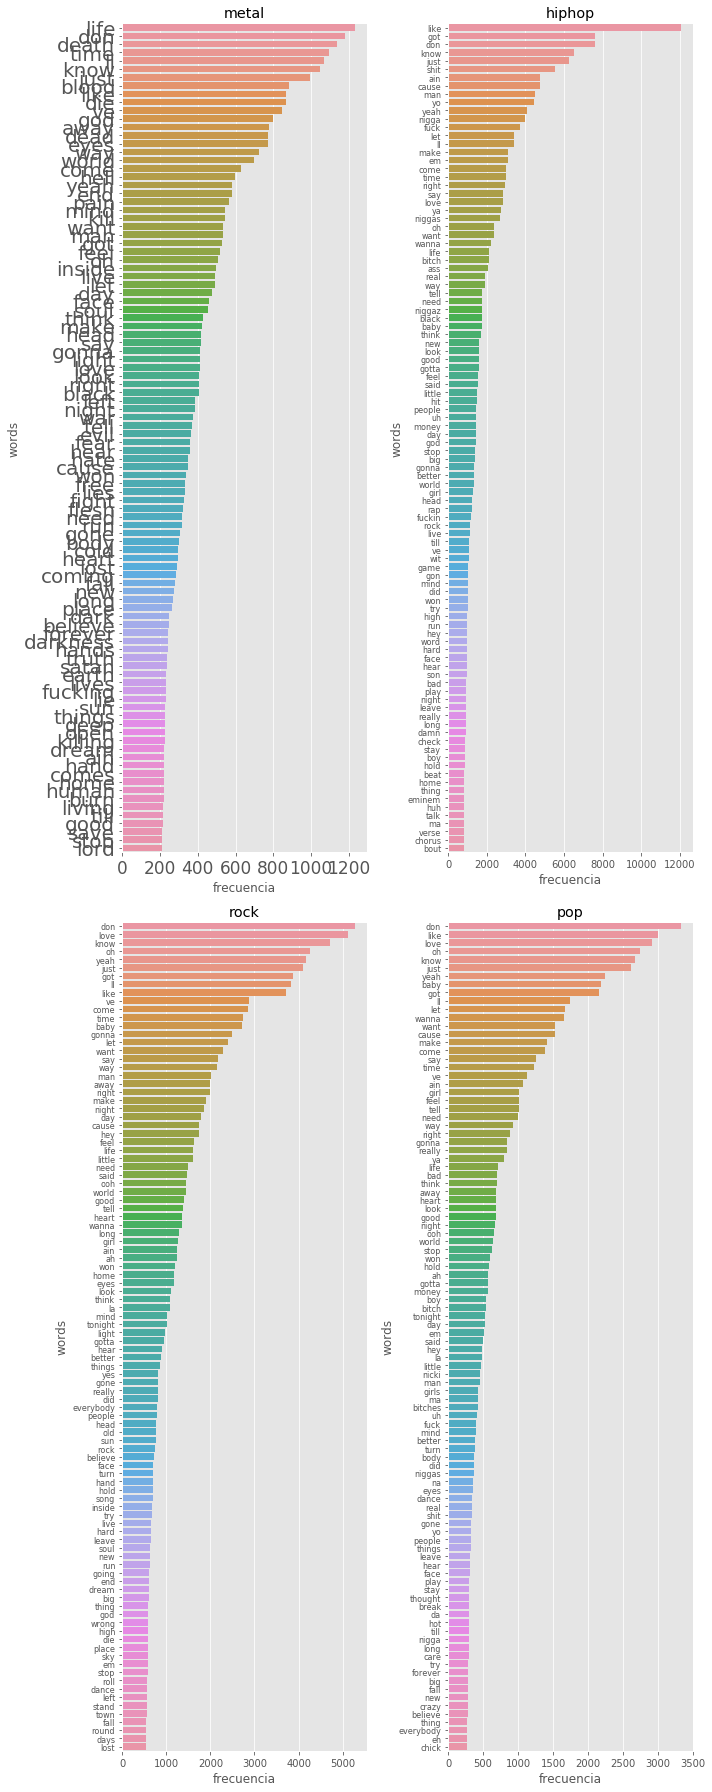

In [12]:
plt.figure(figsize = (10,25))

for indice, genero in enumerate(df_lyrics['Genre'].unique()):
    df_tmp = get_words(df_lyrics[df_lyrics['Genre'] == genero])
    plt.subplot(2,2,indice + 1)
    plt.rcParams["ytick.labelsize"] = 8
    plt.rcParams["xtick.labelsize"] = 10
    sns.barplot(y =df_tmp['words'], x = df_tmp['frecuencia'])
    plt.title(genero)
    plt.tight_layout()

En los 4 generos existe una alta frecuencia de la palabra 'don'. El genero metal tiene como mayor frecuencia la palabra 'life' llegando a un conteo cercano a 1200; el hip hop, posee la mayor frecuencia de palabras con 'like', llegando a 12000 apariciones. En los generos rock y pop, la palabra mas recurrente corresponde a 'don'con 5000 y 3500 apariciones respectivamente.

#### Ejercicio 4: Entrenamiento del Modelo
* Digresión: sklearn Pipelines
    * La clase Pipeline del módulo sklearn.pipeline permite concatenar múltiples pasos de procesamiento y preprocesamiento en un estimador generado por algún método de scikitlearn . En sí, la clase cuenta con los métodos clásicos fit , predict y score y presenta un comportamiento idéntico a los demás objetos de scikit-learn . Uno de los usos más comunes es para concatenar pasos de preprocesamiento con un modelo.
    
* Componentes de un Pipeline
   * Imaginemos que deseamos implementar el siguiente modelo. Considerando un conjunto de datos, deseo Estandarlizarlo, posteriormente extraer sus principales componentes y finalmente aplicar un modelo de regresión lineal. Este flujo se puede reexpresar como:
       
```python
pipeline_model = Pipeline([('scale', StandardScaler()),
                            ('pca', RandomizedPCA(n_components=3)),
                            ('model', LinearRegression())])
```
Algunos de los elementos a considerar:
1. Cada paso se considera como una tupla, donde se declara el nombre del paso y la función a implementar. En este caso, nuestro primer paso es estandarizar la matriz, por lo que asociamos el método StandardScaler con el string scale .
2. Todos los pasos declarados se incorporan en una lista, donde el orden de ingreso representa el orden de ejecución.
Posteriormente el objeto creado puede utilizarse con los siguientes métodos

```python
pipeline_model.fit(X_train, y_train)
y_hat = pipeline_model.predict(y_test)
```
* Importe MultinomialNB , train_test_split , Pipeline , confusion_matrix y classification_report
* Genere las muestras de entrenamiento y validación reservando un 40% para validación y declarando una semilla pseudoaleatoria.
* Monte el modelo dentro de un Pipeline , donde el primer paso es implementar CountVectorizer y el segundo sea ejecutar el clasificador MultinomialNB .
* A continuación se les presenta una lista de letras, ¿cuáles serían las predicciones correspondientes?
```python
['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris -Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks -Drowning
]
```
* Genere una predicción implementando la muestra de validación y contraste las predicciones del modelo con las etiquetas verdaderas. Reporte las principales métricas.

#### Pipeline

In [13]:
#muestras de entrenamiento y validacion
y = df_lyrics['Genre']
x = df_lyrics['Lyrics']

x_train,x_test,y_train, y_test = train_test_split(x,y, test_size = .4, random_state = 25)

pipeline_model = Pipeline(
    [('counter', CountVectorizer(stop_words = 'english')),
     ('model', MultinomialNB())
     ])
pipeline_model.fit(x_train, y_train);

In [14]:

lyrics_list = ['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch, get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris -Move B*tch
'Sexual violence doesn’t start and end with rape It starts in our books and behind our school gates' # IDLES - Mother,
"Take it from the girl you claimed to love You gonna get some bad karma I'm the one who had to learn to build a heart made of armor From the girl who made you soup and tied your shoes when you were hurting You are not deserving, you are not deserving" #Banks -Drowning
]

#### Metricas

In [15]:
 print(f'Las principales metricas son: {pipeline_model.predict(lyrics_list)}')

Las principales metricas son: ['rock' 'metal' 'rock' 'pop' 'rock']


In [16]:
y_hat = pipeline_model.predict(x_test)
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

      hiphop       0.85      0.92      0.88      1013
       metal       0.82      0.71      0.76       642
         pop       0.67      0.37      0.47       501
        rock       0.75      0.86      0.80      1640

    accuracy                           0.79      3796
   macro avg       0.77      0.71      0.73      3796
weighted avg       0.78      0.79      0.77      3796



El modelo presenta un 79% de exactitud. Posee un 85% de asertividad al predecir el genero hiphop y 67% el genero pop.
* precisión (Porcentaje de identificaciones positivas correctas por sobre el total de predicciones como positivas)
* recall (Porcentaje de identificaciones positivas por sobre el total de predicciones correctas)
* F1 (Media armónica entre Precision y Recall). 

                                                            ***